In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams.update({'font.size': 20}) #tamanho da fonte do gráfico
plt.rcParams['xtick.labelsize'] = 20 #tamanho da fonte
plt.rcParams['ytick.labelsize'] = 20 #tamanho da fonte

In [2]:
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv', index_col='id')
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [3]:
serie = eel[(eel['util'] == 'nasc') & (eel['num_nasc'] < 200)]

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++=

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 
         'date_nasc', 
         'data_inicio', 
         'date_acas', 
         'date_nasc_acas', 
         'date_sex', 
         'data_solic', 
         'data_forn', 
         'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for s in datas:
    serie[s] = pd.to_datetime(serie[s], unit = 's') #indica o formato das datas
    
serie.head()

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [4]:
ling_ex = [
    'Test',
    'AAA',
    'Swiss',
    'C57BL06WT\t',
    'Swiss/CFW B',
    'Swiss/CFW D',
    'Swiss/CFW A',
    'Swiss/CFW C',
    'Swiss/CFW',
    'Swiss-2',
    'Swiss-2 A ',
    'NZB/BINJ',
    'NZW/LacJ',
    'NOD / SHILTJ'
]

tirar_ling = serie[
    (serie['ling'] != ling_ex[0]) &
    (serie['ling'] != ling_ex[1]) &
    (serie['ling'] != ling_ex[2]) &
    (serie['ling'] != ling_ex[3]) &
    (serie['ling'] != ling_ex[4]) &
    (serie['ling'] != ling_ex[5]) &
    (serie['ling'] != ling_ex[6]) &
    (serie['ling'] != ling_ex[7]) &
    (serie['ling'] != ling_ex[8]) &
    (serie['ling'] != ling_ex[9]) &
    (serie['ling'] != ling_ex[10]) &
    (serie['ling'] != ling_ex[11]) &
    (serie['ling'] != ling_ex[12]) &
    (serie['ling'] != ling_ex[13])
]
len(tirar_ling)

1785

In [5]:
serie_temp = pd.DataFrame(tirar_ling['date_hoje'])
serie_temp['ling'] = tirar_ling['ling'] 
serie_temp['num_nasc'] = tirar_ling['num_nasc']
serie_temp = serie_temp.set_index('date_hoje')
serie_temp.head()

,ling,num_nasc
date_hoje,,
2014-09-23 17:40:33,Swiss E,5
2014-09-23 17:40:33,Swiss E,10
2014-09-23 17:40:33,Swiss C,20
2014-09-23 17:40:47,Swiss E,10
2014-09-23 17:40:47,Swiss E,20


In [6]:
serie_temp['ling'].replace([' S129WT', 'S129WT'], '129/SV-E', inplace=True)
#serie_temp[(serie_temp['ling'] == '129/SV-E')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''

#Substituindo linhagens  - ' S129KO'  PARA 'S129KO'

serie_temp['ling'].replace(' S129KO', 'S129KO', inplace=True)
#serie_temp[(serie_temp['ling'] == 'S129KO')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'C57BL06WT'  PARA 'C57BL/6'

serie_temp['ling'].replace('C57BL06WT', 'C57BL/6', inplace=True)
#serie_temp_ling[(serie_temp_ling['ling'] == 'C57BL/6')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss A' PARA 'Swiss-1 A'

serie_temp['ling'].replace('Swiss A', 'Swiss-1 A', inplace=True)
#serie_temp[(serie_temp['ling'] == 'Swiss-1 A')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss B' PARA 'Swiss-1 B'

serie_temp['ling'].replace('Swiss B', 'Swiss-1 B', inplace=True)
#serie_temp[(serie_temp['ling'] == 'Swiss-1 B')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss C' PARA 'Swiss-1 C'

serie_temp['ling'].replace('Swiss C', 'Swiss-1 C', inplace=True)
#serie_temp[(serie_temp['ling'] == 'Swiss-1 C')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss D' PARA 'Swiss-1 D'

serie_temp['ling'].replace('Swiss D', 'Swiss-1 D', inplace=True)
#serie_temp[(serie_temp['ling'] == 'Swiss-1 D')].info()

'''
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
'''
#Substituindo linhagens  - 'Swiss E' PARA 'Swiss-1 E'

serie_temp['ling'].replace('Swiss E', 'Swiss-1 E', inplace=True)
#serie_temp[(serie_temp['ling'] == 'Swiss-1 E')].info()

In [7]:
serie_temp['ling'].value_counts()

Balb/c       498
C57BL/6      460
S129KO       250
129/SV-E     149
C3H          102
Swiss-1 E     47
Swiss-1 A     37
Swiss-1 B     32
Swiss-1 C     32
Swiss-1 D     31
Swiss-2 C     27
Swiss-2 B     24
DBA/1J        24
Swiss-2 D     21
Swiss-2 E     21
Swiss-2 A     21
AG129          9
Name: ling, dtype: int64

In [8]:
quartis = serie_temp.groupby('ling')
quartis.describe()

num_nasc                                                   
             count       mean        std  min   25%   50%   75%   max
ling                                                                 
129/SV-E     149.0   6.073826   3.042701  1.0   4.0   6.0   8.0  19.0
AG129          9.0   4.777778   2.166667  1.0   4.0   5.0   6.0   8.0
Balb/c       498.0   8.612450   5.852342  1.0   5.0   7.0  11.0  60.0
C3H          102.0   5.911765   2.821779  1.0   4.0   6.0   7.0  15.0
C57BL/6      460.0   8.697826   5.178091  1.0   6.0   8.0  10.0  50.0
DBA/1J        24.0   9.583333   1.976309  3.0  10.0  10.0  10.0  13.0
S129KO       250.0   6.448000   4.234978  1.0   4.0   6.0   8.0  45.0
Swiss-1 A     37.0  10.918919   4.895454  4.0   8.0  11.0  13.0  30.0
Swiss-1 B     32.0  10.750000   4.087747  4.0   9.0  10.0  12.0  28.0
Swiss-1 C     32.0  12.906250  10.831136  3.0   8.0  10.0  14.0  60.0
Swiss-1 D     31.0  10.032258   2.983107  4.0   8.5  10.0  11.5  17.0
Swiss-1 E     47.0  11.297872   5.755583  2.0   8.0  10.0  12.0  34.0
Swiss-2 A     21.0  10.761905   3.176551  4.0   9.0  11.0  12.0  17.0
Swiss-2 B     24.0  10.500000   2.766256  2.0  10.0  10.5  12.0  16.0
Swiss-2 C     27.0   9.851852   2.444833  5.0   8.0  10.0  12.0  15.0
Swiss-2 D     21.0  11.857143   7.786435  2.0  10.0  10.0  12.0  44.0
Swiss-2 E     21.0   9.904762   1.700140  6.0   9.0  10.0  11.0  12.0

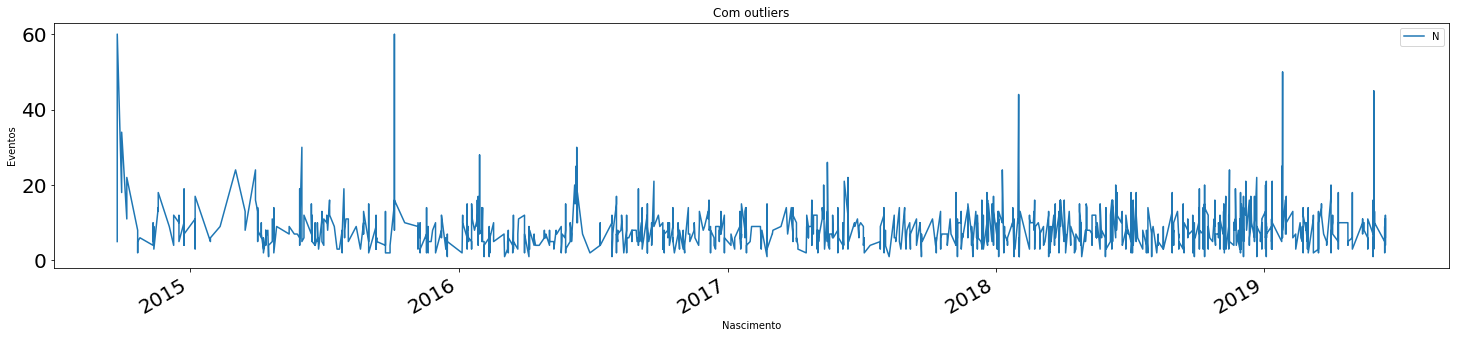

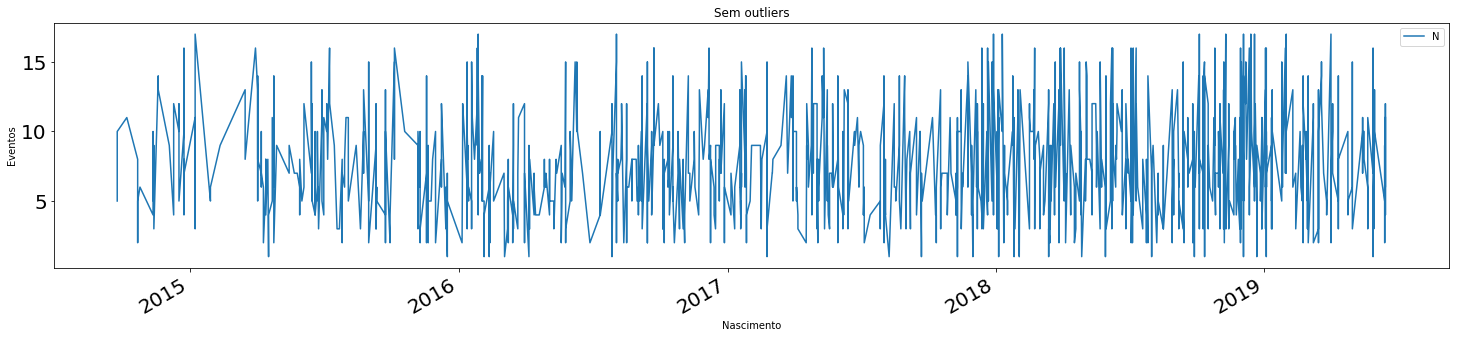

In [9]:
q1 = serie_temp['num_nasc'].quantile(0.25)
q3 = serie_temp['num_nasc'].quantile(0.75)
iqr = q3 - q1

serie_temp[['num_nasc']].plot(
    figsize=(25, 5))
plt.legend('Número de nascidos', loc = 'best')
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')

plt.savefig(
    fname="../resultados/15comoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

serie_temp[(serie_temp['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp['num_nasc'] < (q3 + 1.5 * iqr))].plot(
    figsize=(25, 5))
plt.legend('Número nascidos')
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')

plt.savefig(
    fname="../resultados/15retiradaoutliers.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

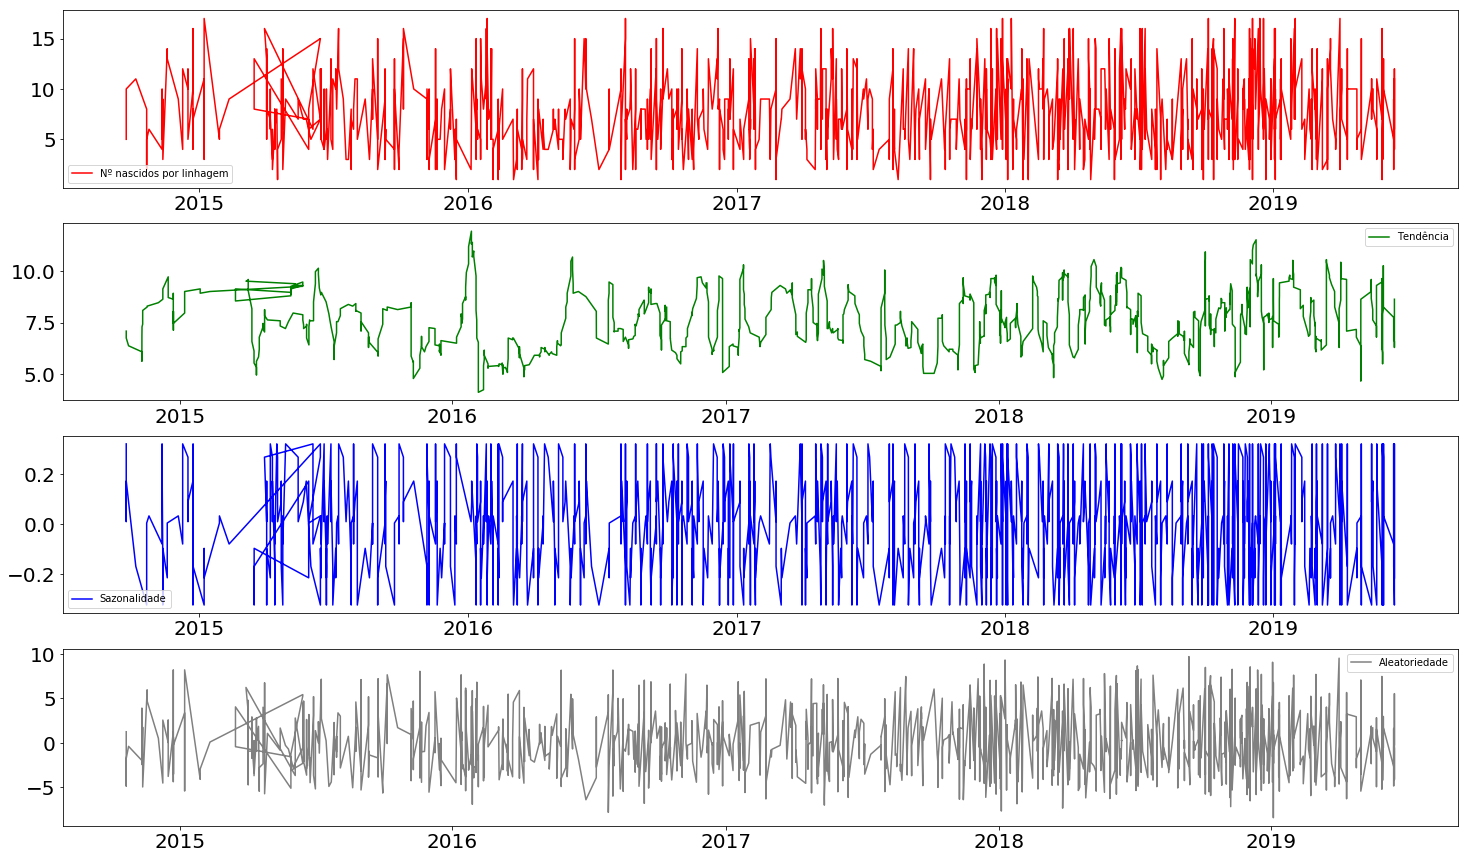

In [11]:
df = serie_temp[(serie_temp['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp['num_nasc'] < (q3 + 1.5 * iqr))]['num_nasc']
decom = seasonal_decompose(df, freq=12)

plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])


plt.subplot(4, 1, 1)
plt.plot(df, label = 'Nº nascidos por linhagem', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.savefig(
    fname="../resultados/15_pergunta_retirada_out_serietemp.png", #pasta e nome do arquivo onde vai ser salvo
    bbox_inches='tight', #função que deixa o gráfico mais próxima da margem
    dpi=150, #numero de pixels da imagem?
    transparent=True #deixar o gráfico transparente
)

Text(0, 0.5, 'Eventos')

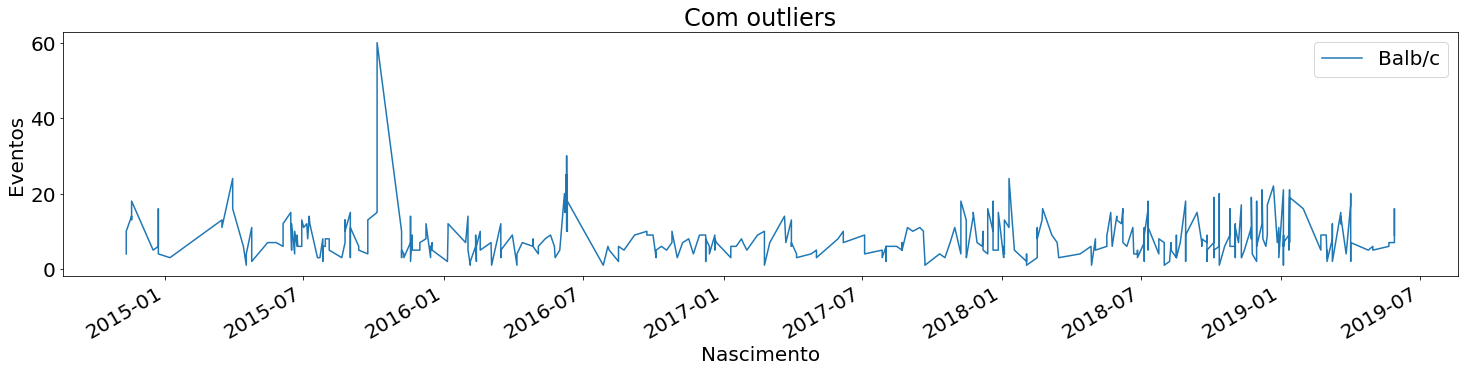

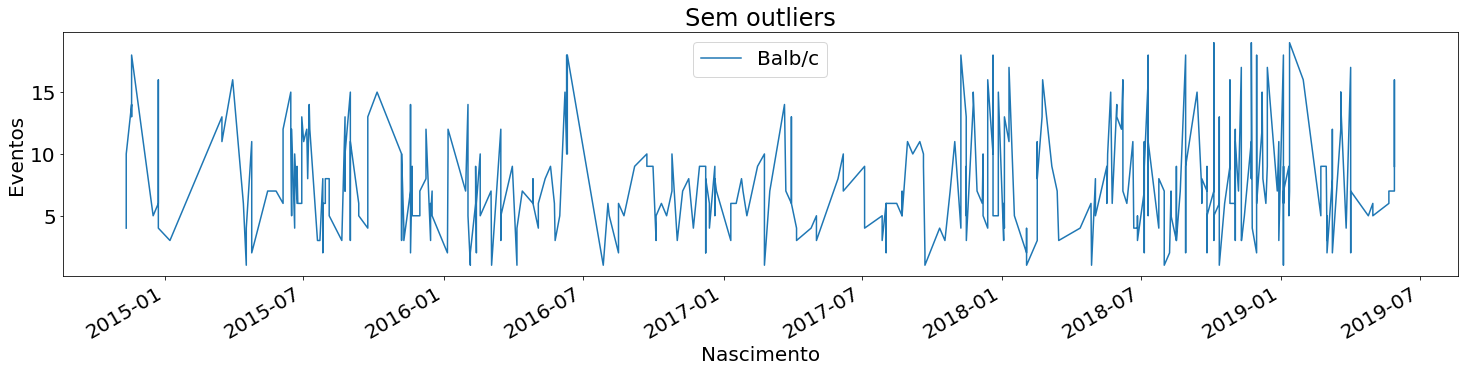

In [22]:
ling_test = 'Balb/c'

q1 = serie_temp[serie_temp['ling'] == ling_test]['num_nasc'].quantile(0.25)
q3 = serie_temp[serie_temp['ling'] == ling_test]['num_nasc'].quantile(0.75)
iqr = q3 - q1
serie_temp[(serie_temp['ling'] == ling_test)
].plot(
    figsize=(25, 5))
plt.legend([ling_test])
plt.title('Com outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')

serie_temp[(serie_temp['ling'] == ling_test) & 
         (serie_temp['num_nasc'] > (q1 - 1.5 * iqr)) &
         (serie_temp['num_nasc'] < (q3 + 1.5 * iqr))
          
].plot(
    figsize=(25, 5))
plt.legend([ling_test])
plt.title('Sem outliers')
plt.xlabel('Nascimento')
plt.ylabel('Eventos')
